# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
citytype_total_rides = pyber_data_df.groupby('type')['ride_id'].count()
citytype_total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_driver_count=city_data_df.groupby('type')['driver_count'].sum()
total_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type

total_all_fares = pyber_data_df.groupby('type')['fare'].sum()
total_all_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_ride = pyber_data_df.groupby('type')['fare'].mean()
avg_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_driver_fare = total_all_fares / total_driver_count
avg_driver_fare


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
pyber_summary= pd.DataFrame({
    'Total Rides':total_all_fares, 
    'Total Drivers':total_driver_count,
    'Total Fares':total_all_fares,
    'Avg. Fare per Ride':avg_fare_ride,
    'Avg. Fare per Driver':avg_driver_fare})

pyber_summary.head()

,Total Rides,Total Drivers,Total Fares,Avg. Fare per Ride,Avg. Fare per Driver
type,,,,,
Rural,4327.93,78,4327.93,34.623440,55.486282
Suburban,19356.33,490,19356.33,30.970128,39.502714
Urban,39854.38,2405,39854.38,24.525772,16.571468


In [9]:
#  6. Create a PyBer summary DataFrame. Example 2 (tutoring session)
grp = pyber_data_df.groupby('type')
grp2 = city_data_df.groupby('type')

pyber_summary_df=pd.DataFrame({
    'Total Rides': grp.ride_id.count(),
    'Total Drivers': grp2.driver_count.sum(),
    'Total Fares' : grp.fare.sum(),
    'Avg. Fare per Ride' : grp.fare.mean(),
    'Avg. Fare per Driver': grp.fare.sum()/grp2.driver_count.sum()
})
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Avg. Fare per Ride,Avg. Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [26]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name=""
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Avg. Fare per Ride,Avg. Fare per Driver
,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [12]:
pd.options.display.float_format = '${:,.2f}'.format

In [13]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map('{:,}'.format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map('{:,}'.format)
pyber_summary_df[:5]

,Total Rides,Total Drivers,Total Fares,Avg. Fare per Ride,Avg. Fare per Driver
,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [14]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,$13.83,"$5,739,410,000,000.00",5,Urban
1,South Michelleport,3/4/2019 18:24,$30.24,"$2,343,910,000,000.00",72,Urban
2,Port Samanthamouth,2/24/2019 4:29,$33.44,"$2,005,070,000,000.00",57,Urban
3,Rodneyfort,2/10/2019 23:22,$23.44,"$5,149,250,000,000.00",34,Urban
4,South Jack,3/6/2019 4:28,$34.58,"$3,908,450,000,000.00",46,Urban


In [15]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_ttl_fares = pyber_data_df.groupby(['type','date']).fare.sum()
type_ttl_fares


type   date           
Rural  1/1/2019 9:45     $43.69
       1/11/2019 4:39    $16.42
       1/14/2019 15:58   $54.10
       1/14/2019 7:09    $18.05
       1/15/2019 21:44   $30.26
                          ...  
Urban  5/8/2019 1:54     $32.69
       5/8/2019 2:31     $41.33
       5/8/2019 4:20     $21.99
       5/8/2019 4:39     $18.45
       5/8/2019 7:29     $18.55
Name: fare, Length: 2364, dtype: float64

In [16]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
type_ttl_fares = type_ttl_fares.reset_index()
type_ttl_fares

,type,date,fare
0,Rural,1/1/2019 9:45,$43.69
1,Rural,1/11/2019 4:39,$16.42
2,Rural,1/14/2019 15:58,$54.10
3,Rural,1/14/2019 7:09,$18.05
4,Rural,1/15/2019 21:44,$30.26
...,...,...,...
2359,Urban,5/8/2019 1:54,$32.69
2360,Urban,5/8/2019 2:31,$41.33
2361,Urban,5/8/2019 4:20,$21.99
2362,Urban,5/8/2019 4:39,$18.45


In [17]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date.
fare_pivot = type_ttl_fares.pivot(index='date', columns = 'type', values = 'fare')
fare_pivot

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,$37.91
1/1/2019 0:46,NaN,$47.74,NaN
1/1/2019 12:32,NaN,$25.56,NaN
1/1/2019 14:40,NaN,NaN,$5.42
1/1/2019 14:42,NaN,NaN,$12.31
...,...,...,...
5/8/2019 1:54,NaN,NaN,$32.69
5/8/2019 2:31,NaN,NaN,$41.33
5/8/2019 4:20,NaN,NaN,$21.99


In [32]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_pivot = fare_pivot.loc['2019-01-01':'2019-04-29', :]
fare_pivot


C:\Users\jorda\AppData\Local\Temp\ipykernel_6532\542704313.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  fare_pivot = fare_pivot.loc['2019-01-01':'2019-04-29', :]


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,$37.91
2019-01-01 00:46:00,NaN,$47.74,NaN
2019-01-01 12:32:00,NaN,$25.56,NaN
2019-01-01 14:40:00,NaN,NaN,$5.42
2019-01-01 14:42:00,NaN,NaN,$12.31
...,...,...,...
2019-04-09 20:55:00,NaN,NaN,$24.99
2019-04-09 21:41:00,NaN,NaN,$15.96
2019-04-09 08:10:00,NaN,NaN,$39.36


In [33]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
from datetime import datetime
fare_pivot.index = pd.to_datetime(fare_pivot.index)
fare_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,$37.91
2019-01-01 00:46:00,NaN,$47.74,NaN
2019-01-01 12:32:00,NaN,$25.56,NaN
2019-01-01 14:40:00,NaN,NaN,$5.42
2019-01-01 14:42:00,NaN,NaN,$12.31
...,...,...,...
2019-04-09 20:55:00,NaN,NaN,$24.99
2019-04-09 21:41:00,NaN,NaN,$15.96
2019-04-09 08:10:00,NaN,NaN,$39.36


In [34]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_pivot.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-09 09:17:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [35]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_pivot_weekly = fare_pivot.resample('W').sum()
fare_pivot_weekly

type,Rural,Suburban,Urban
date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"
2019-02-10,$115.80,$974.34,"$2,162.64"
2019-02-17,$95.82,"$1,045.50","$2,235.07"
2019-02-24,$419.06,"$1,412.74","$2,466.29"
2019-03-03,$175.14,$858.46,"$2,218.20"


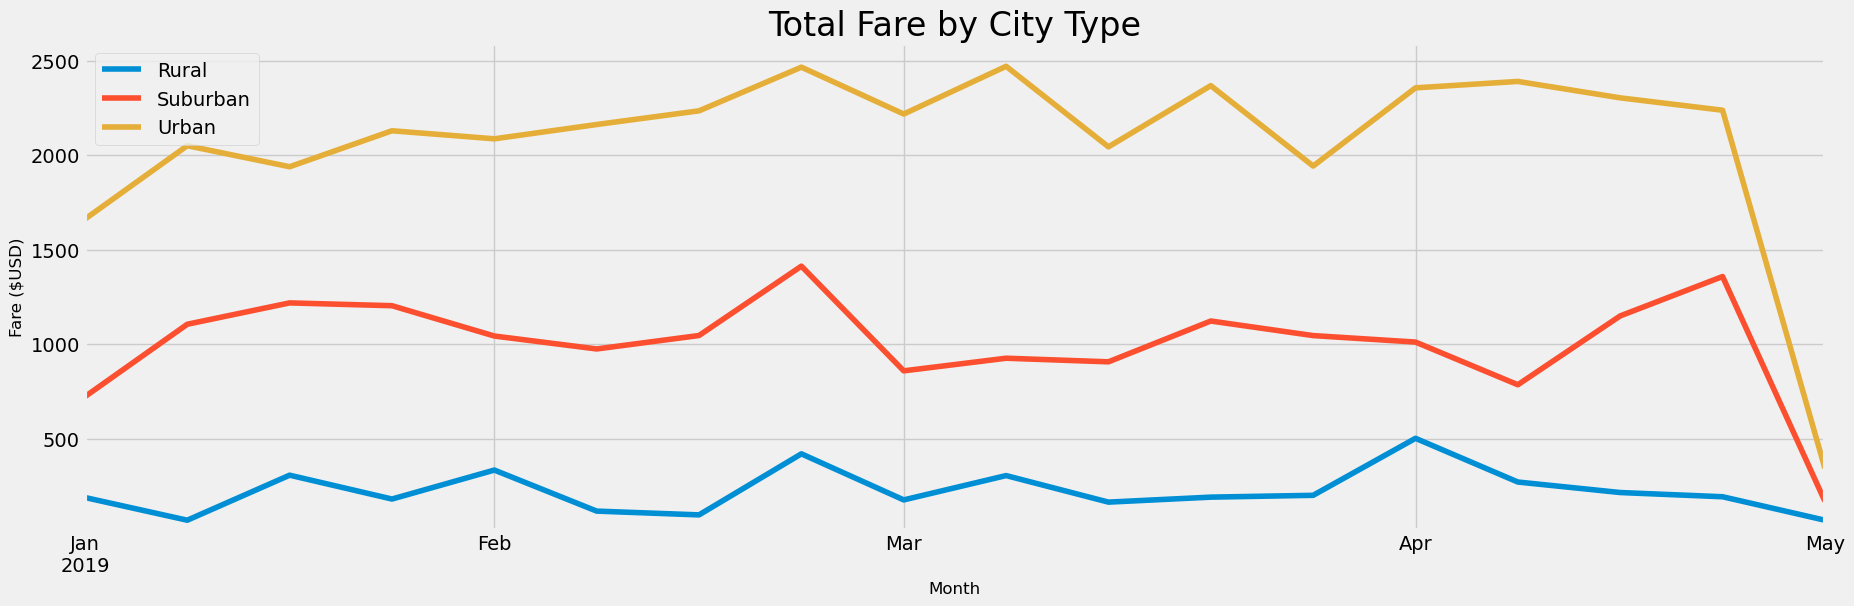

<Figure size 640x480 with 0 Axes>

In [36]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the 'fivethirtyeight' style
plt.style.use('fivethirtyeight')
#create line graph from pivot
fare_pivot_weekly.plot(figsize = (20,6))

#create title and labels for axis
plt.title('Total Fare by City Type', fontsize = '24')
plt.xlabel('Month', fontsize = '12')
plt.ylabel('Fare ($USD)', fontsize = '12')
plt.ylim(len(fare_pivot_weekly))
plt.legend()

plt.tight_layout
plt.show()
plt.savefig('Analysis/Pyber-fare_summary')
